## **Mengimport module**

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate
from sklearn.feature_selection import RFECV

import xgboost as xgb
from xgboost import cv, DMatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score

## **Membaca Data**

In [20]:
data = pd.read_csv("diabetes_data.csv")
data.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Preprocessing Data**

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,70692.0,8.584055,2.852153,1.0,7.0,9.0,11.0,13.0
Sex,70692.0,0.456997,0.498151,0.0,0.0,0.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0
Veggies,70692.0,0.788774,0.408181,0.0,1.0,1.0,1.0,1.0


In [23]:
##Mengecek nilai kosong (missing value)
data.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [24]:
##Menghapus data duplikat
data.drop_duplicates()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


In [25]:
##Mengubah tipe kolom
variabel_numerik = data.columns.difference(['BMI', 'MentHlth', 'PhysHlth'])
data[variabel_numerik] = data[variabel_numerik].astype('category')
data[variabel_numerik] = data[variabel_numerik].apply(lambda x: x.cat.codes)

In [26]:
##Menyeleksi variabel (feature selection)
X = data.drop(["Diabetes"], axis = 1)
y = data["Diabetes"]

estimator = DecisionTreeClassifier(max_depth=5,min_samples_split=100)
rfecv = RFECV(estimator=estimator, cv=StratifiedKFold(10, random_state=42, shuffle=True), scoring="accuracy")
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
      estimator=DecisionTreeClassifier(max_depth=5, min_samples_split=100),
      scoring='accuracy')

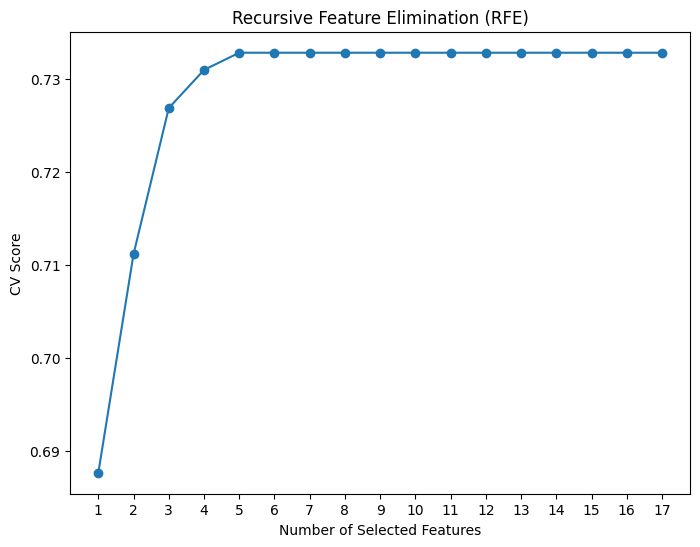

The optimal number of features: 5


In [27]:
##Plot RFE
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o')
plt.xticks(range(1, X.shape[1] + 1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

In [28]:
##Prediktor terpilih
selected_features = X.columns[rfecv.support_]
X_selected = X[selected_features]

In [29]:
data['Diabetes'].value_counts()

Diabetes
0    35346
1    35346
Name: count, dtype: int64

In [30]:
##Membagi data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
X_train.head()

,Age,HighChol,BMI,GenHlth,HighBP
47977,9,0,29.0,1,1
2676,6,1,24.0,2,0
35637,10,0,42.0,2,1
52420,9,1,30.0,2,1
12445,5,0,35.0,2,1


In [32]:
X_test.head()

,Age,HighChol,BMI,GenHlth,HighBP
57608,9,1,53.0,3,1
18474,11,1,31.0,2,1
47268,12,1,18.0,2,1
31419,6,0,21.0,0,0
56545,6,1,38.0,2,1


In [33]:
y_train.head()

47977    1
2676     0
35637    1
52420    1
12445    0
Name: Diabetes, dtype: int8

In [34]:
y_test.head()

57608    1
18474    0
47268    1
31419    0
56545    1
Name: Diabetes, dtype: int8

In [35]:
##Menstandarisasi data
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Melakukan Klasifikasi**

In [36]:
xg = xgb.XGBClassifier(n_estimators=350)
xg.fit(X_train, y_train)
xg_preds = xg.predict(X_test)
print(classification_report(y_test, xg_preds))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      7070
           1       0.72      0.78      0.75      7069

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



## **XGBoost dan Cross Validation**

In [37]:
# Inisialisasi data dan parameter
params = {
    "objective": "binary:logistic",
    "colsample_bytree": 0.3,
    "learning_rate": 0.1,
    "max_depth": 10,
    "alpha": 10,
}
data_dmatrix = DMatrix(data=X_train, label=y_train)  # Ganti X_train dan y_train sesuai data Anda

# List untuk menyimpan hasil dari masing-masing nfold
nfolds = [3, 5, 10]
best_results = {}

for n in nfolds:
    # Menjalankan cross-validation untuk setiap nilai nfold
    xgb_cv = cv(
        dtrain=data_dmatrix,
        params=params,
        nfold=n,
        num_boost_round=50,  # Jumlah iterasi yang digunakan selama cross-validation
        early_stopping_rounds=10,
        metrics="auc",
        as_pandas=True,
        seed=42,
    )
    
    # Menyimpan iterasi terbaik berdasarkan AUC
    best_iteration = xgb_cv['test-auc-mean'].idxmax()
    best_auc = xgb_cv['test-auc-mean'].iloc[best_iteration]
    # Tidak perlu menambahkan n_estimators dalam params, gunakan num_boost_round
    best_num_boost_round = best_iteration  # Gunakan jumlah iterasi terbaik
    
    # Membuat model dengan jumlah estimators terbaik
    model = xgb.XGBClassifier(**params, n_estimators=best_num_boost_round)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Menghitung recall pada data uji
    recall = recall_score(y_test, y_pred)
    best_results[n] = {
        'best_iteration': best_iteration,
        'recall': recall,
        'xgb_cv': xgb_cv
    }
    
    print(f"nfold = {n}")
    print(f"Best Recall: {recall} at iteration {best_iteration}")
    
    # Menampilkan classification report untuk nfold ini
    print(f"Classification report for nfold = {n}:")
    print(classification_report(y_test, y_pred))
    print("="*50)

# Menentukan nfold dengan recall terbaik
best_nfold = max(best_results, key=lambda x: best_results[x]['recall'])
print(f"nfold terbaik berdasarkan Recall adalah: {best_nfold} dengan Recall {best_results[best_nfold]['recall']}")

nfold = 3
Best Recall: 0.7702645352949498 at iteration 48
Classification report for nfold = 3:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73      7070
           1       0.73      0.77      0.75      7069

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139

nfold = 5
Best Recall: 0.7715376998160984 at iteration 49
Classification report for nfold = 5:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73      7070
           1       0.73      0.77      0.75      7069

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139

nfold = 10
Best Recall: 0.7715376998160984 at iteration 49
Classification report for nfold = 10:
              precision    recall  f1-score   support

    

## **Membuat Confussion Matrix**

In [38]:
# Membuat model terbaik berdasarkan nfold terbaik dan iterasi terbaik
best_iteration = best_results[best_nfold]['best_iteration']
params['n_estimators'] = best_iteration  # Set n_estimators ke iterasi terbaik

In [39]:
# Latih model dengan data pelatihan
model_best = xgb.XGBClassifier(**params)
model_best.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=49, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, ...)

In [40]:
# Prediksi data uji
y_pred_best = model_best.predict(X_test)

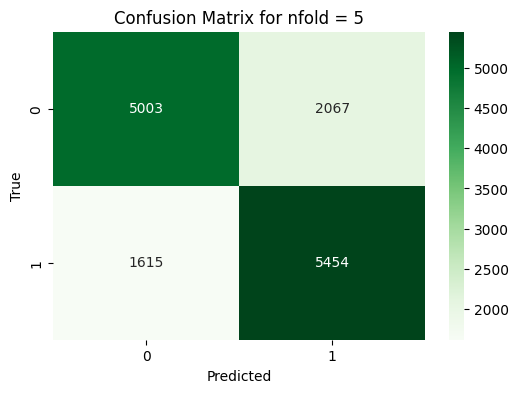

In [41]:
# Menghitung dan menampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for nfold = {best_nfold}')
plt.show()

## **Menyimpan Model**

In [42]:
import joblib
import os

# Tentukan path folder spesifik
folder_path = "./Output_Model"
os.makedirs(folder_path, exist_ok=True)  # Buat folder jika belum ada

# Simpan model XGBoost ke folder spesifik
joblib.dump(model_best, os.path.join(folder_path, 'xgboost_dm.pkl'))

['./Output_Model\\xgboost_dm.pkl']